<a href="https://colab.research.google.com/github/Diwash17/5CS037_2407736_2024_Diwash_Adhikari/blob/main/Decision_Tree_Scratch_and_scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom vs. Scikit learn Built Decision Tree

## Buld a Custom Decision Tree

In [1]:
import numpy as np

class CustomDecisionTree:
    def __init__(self, max_depth=None):
        """
        Initializes the decision tree with the specified maximum depth.

        Parameters:
        max_depth (int, optional): The maximum depth of the tree. If None, the tree is expanded until all leaves are pure or contain fewer than the minimum samples required to split.
        """
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """
        Trains the decision tree model using the provided training data.

        Parameters:
        X (array-like): Feature matrix (n_samples, n_features) for training the model.
        y (array-like): Target labels (n_samples,) for training the model.
        """
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        """
        Recursively builds the decision tree by splitting the data based on the best feature and threshold.

        Parameters:
        X (array-like): Feature matrix (n_samples, n_features) for splitting.
        y (array-like): Target labels (n_samples,) for splitting.
        depth (int, optional): Current depth of the tree during recursion.

        Returns:
        dict: A dictionary representing the structure of the tree, containing the best feature index, threshold, and recursive tree nodes.
        """
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Stopping conditions: pure node or reached max depth
        if len(unique_classes) == 1:
            return {'class': unique_classes[0]}
        if num_samples == 0 or (self.max_depth and depth >= self.max_depth):
            return {'class': np.bincount(y).argmax()}

        # Find the best split based on Information Gain (using Entropy)
        best_info_gain = -float('inf')
        best_split = None
        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                left_y = y[left_mask]
                right_y = y[right_mask]

                info_gain = self._information_gain(y, left_y, right_y)

                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'left_y': left_y,
                        'right_y': right_y,
                    }

        if best_split is None:
            return {'class': np.bincount(y).argmax()}

        # Recursively build the left and right subtrees
        left_tree = self._build_tree(X[best_split['left_y']], best_split['left_y'], depth + 1)
        right_tree = self._build_tree(X[best_split['right_y']], best_split['right_y'], depth + 1)

        return {'feature_idx': best_split['feature_idx'], 'threshold': best_split['threshold'],
                'left_tree': left_tree, 'right_tree': right_tree}

    def _information_gain(self, parent, left, right):
        """
        Computes the Information Gain between the parent node and the left/right child nodes.

        Parameters:
        parent (array-like): The labels of the parent node.
        left (array-like): The labels of the left child node.
        right (array-like): The labels of the right child node.

        Returns:
        float: The Information Gain of the split.
        """
        parent_entropy = self._entropy(parent)
        left_entropy = self._entropy(left)
        right_entropy = self._entropy(right)

        # Information Gain = Entropy(parent) - (weighted average of left and right entropies)
        weighted_avg_entropy = (len(left) / len(parent)) * left_entropy + (len(right) / len(parent)) * right_entropy
        return parent_entropy - weighted_avg_entropy

    def _entropy(self, y):
        """
        Computes the entropy of a set of labels.

        Parameters:
        y (array-like): The labels for which entropy is calculated.

        Returns:
        float: The entropy of the labels.
        """
        # Calculate the probability of each class
        class_probs = np.bincount(y) / len(y)
        # Compute the entropy using the formula: -sum(p * log2(p))
        return -np.sum(class_probs * np.log2(class_probs + 1e-9))  # Added small epsilon to avoid log(0)

    def predict(self, X):
        """
        Predicts the target labels for the given test data based on the trained decision tree.

        Parameters:
        X (array-like): Feature matrix (n_samples, n_features) for prediction.

        Returns:
        list: A list of predicted target labels (n_samples,).
        """
        return [self._predict_single(x, self.tree) for x in X]

    def _predict_single(self, x, tree):
        """
        Recursively predicts the target label for a single sample by traversing the tree.

        Parameters:
        x (array-like): A single feature vector for prediction.
        tree (dict): The current subtree or node to evaluate.

        Returns:
        int: The predicted class label for the sample.
        """
        if 'class' in tree:
            return tree['class']

        feature_val = x[tree['feature_idx']]
        if feature_val <= tree['threshold']:
            return self._predict_single(x, tree['left_tree'])
        else:
            return self._predict_single(x, tree['right_tree'])


## Necessary Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Load and Split the Iris Dataset

In [3]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train and Evaluate the Custom Decision Tree

In [4]:
# Train the custom decision tree
custom_tree = CustomDecisionTree(max_depth=3)
custom_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_custom = custom_tree.predict(X_test)

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Decision Tree Accuracy: {accuracy_custom:.4f}")


Custom Decision Tree Accuracy: 0.8000


## Train and Evaluate the scikit-learn Decision Tree

In [5]:
# Train the Scikit-learn decision tree
sklearn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = sklearn_tree.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Decision Tree Accuracy: {accuracy_sklearn:.4f}")


Scikit-learn Decision Tree Accuracy: 1.0000


## Result Comparision

In [6]:
print(f"Accuracy Comparison:")
print(f"Custom Decision Tree: {accuracy_custom:.4f}")
print(f"Scikit-learn Decision Tree: {accuracy_sklearn:.4f}")


Accuracy Comparison:
Custom Decision Tree: 0.8000
Scikit-learn Decision Tree: 1.0000


In [7]:
from sklearn.tree import plot_tree

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica')]

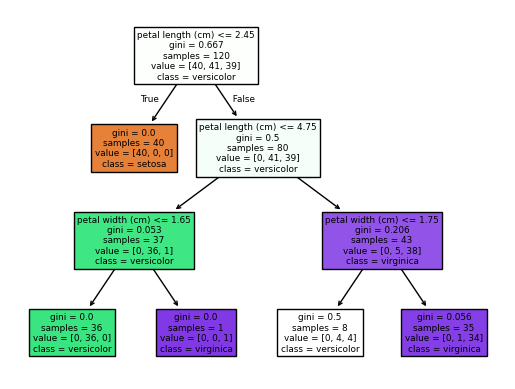

In [8]:
plot_tree(sklearn_tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
